In [77]:
from fbm import FBM
from matplotlib import pyplot as plt

In [78]:
f = FBM(n=1024, hurst=0.5, length=1, method='daviesharte')

fbm_path1 = f.fbm()
times1 = f.times()

fbm_path2 = f.fbm()
times2 = f.times()

### Generacja ścieżek fBm

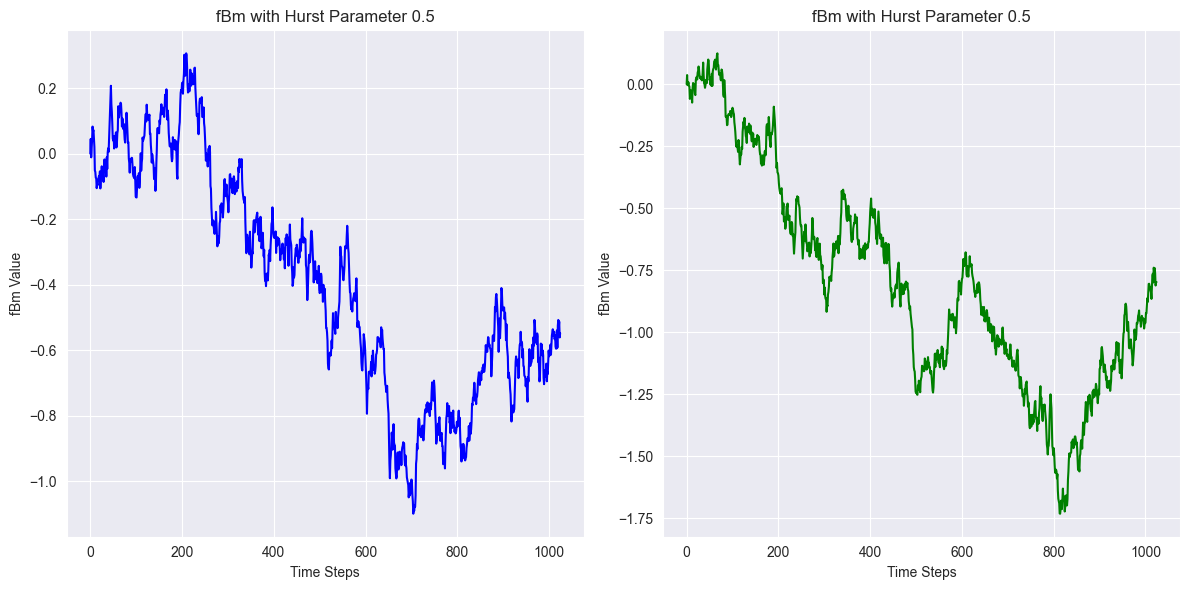

In [79]:
# plot fbm_sample with times
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first fBm path
ax1.plot(fbm_path1, color='blue')
ax1.set_title('fBm with Hurst Parameter 0.5')
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('fBm Value')
ax1.grid(True)

# Plot the second fBm path
ax2.plot(fbm_path2, color='green')
ax2.set_title('fBm with Hurst Parameter 0.5')
ax2.set_xlabel('Time Steps')
ax2.set_ylabel('fBm Value')
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()

### Histogramy dla ścieżek fbm

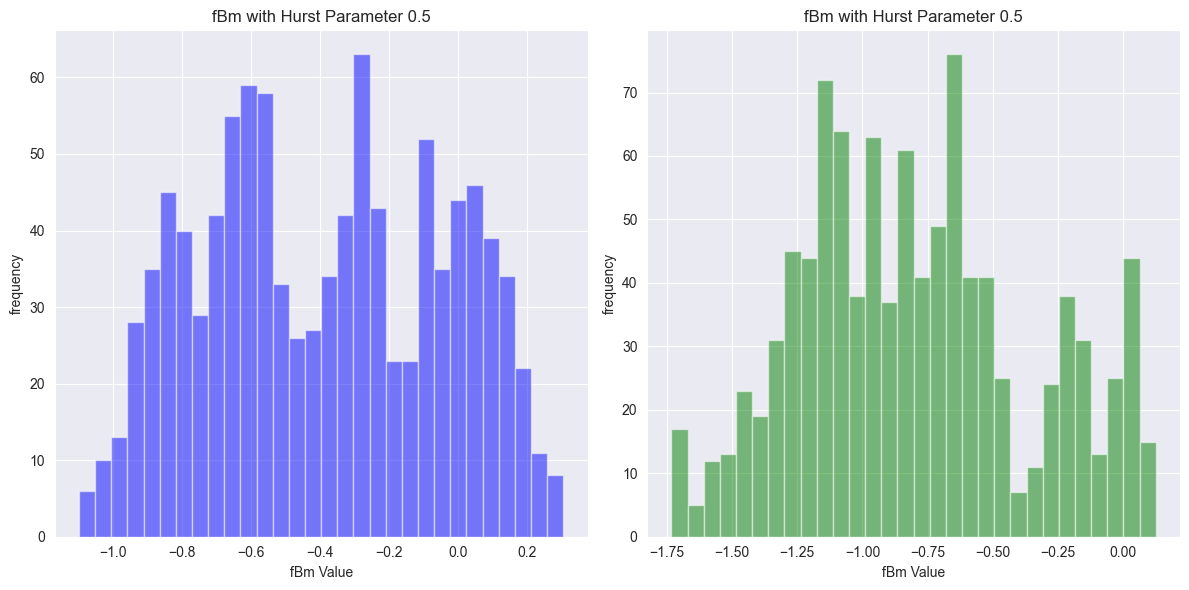

In [80]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first fBm path
ax1.hist(fbm_path1, bins=30, color='blue', alpha=0.5)
ax1.set_title('fBm with Hurst Parameter 0.5')
ax1.set_xlabel('fBm Value')
ax1.set_ylabel('frequency')
ax1.grid(True)

# Plot the second fBm path
ax2.hist(fbm_path2, bins=30, color='green', alpha=0.5)
ax2.set_title('fBm with Hurst Parameter 0.5')
ax2.set_xlabel('fBm Value')
ax2.set_ylabel('frequency')
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()

### Dystrybucja brzegowa fBm

 dla n ścieżek po czasie t

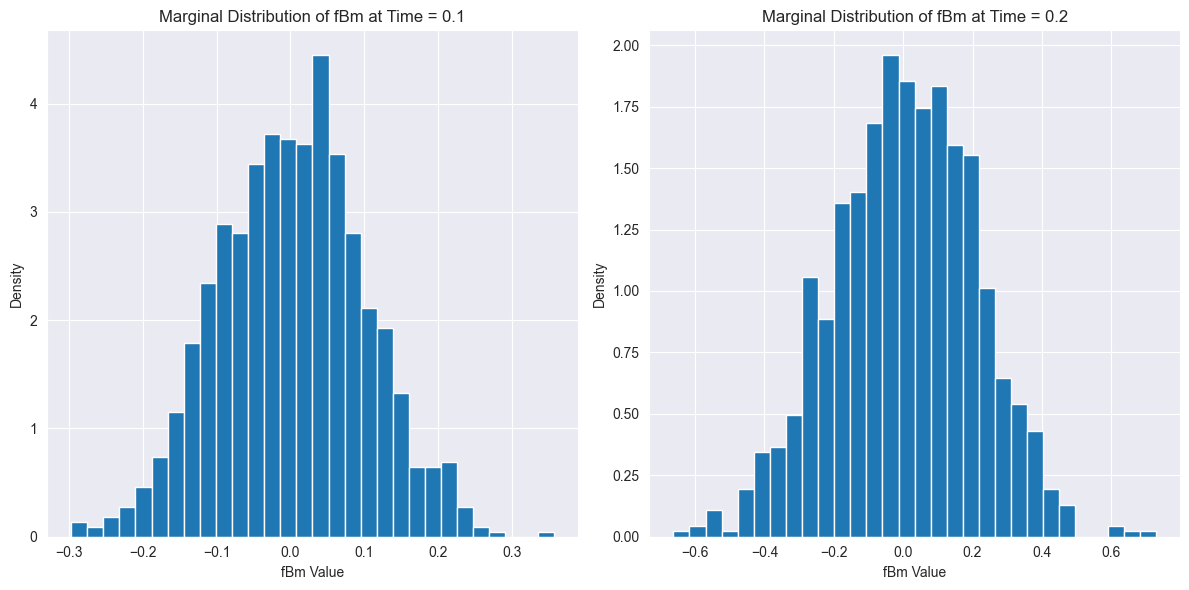

In [85]:
# Parameters
n_paths = 1000  # number of fBm paths to simulate
n_points = 100  # number of points in each path
hurst = 0.5     # Hurst parameter
time1 = 0.1     # time at which to observe the marginal distribution
time2 = 0.2     # time at which to observe the marginal distribution

# Generate fBm paths
f = FBM(n=n_points, hurst=hurst, length=time1, method='daviesharte')
fbm_values_at_time1 = [f.fbm()[int(time1*n_points)] for _ in range(n_paths)]  # Extract the end value of each path
f = FBM(n=n_points, hurst=hurst, length=time2, method='daviesharte')
fbm_values_at_time2 = [f.fbm()[int(time2*n_points)] for _ in range(n_paths)]  # Extract the end value of each path

# Plot marginal distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(fbm_values_at_time1, bins=30, density=True)
ax1.set_title(f'Marginal Distribution of fBm at Time = {time1}')
ax1.set_xlabel('fBm Value')
ax1.set_ylabel('Density')
ax1.grid(True)

ax2.hist(fbm_values_at_time2, bins=30, density=True)
ax2.set_title(f'Marginal Distribution of fBm at Time = {time2}')
ax2.set_xlabel('fBm Value')
ax2.set_ylabel('Density')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [86]:
from scipy.stats import norm
import plotly.express as px
import pandas as pd

unif_1 = norm.cdf(fbm_values_at_time1)
unif_2 = norm.cdf(fbm_values_at_time2)
norm_data = pd.concat([pd.DataFrame(unif_1), pd.DataFrame(unif_2)], axis=1)
norm_data.columns = ['X', 'Y']
norm_data.corr()

fig = px.scatter(norm_data, x = 'X', y='Y', width=700, height=500, trendline='ols', trendline_color_override='DeepPink', marginal_x='histogram', marginal_y='histogram', title='Bi-Variate Normal')
fig.show()

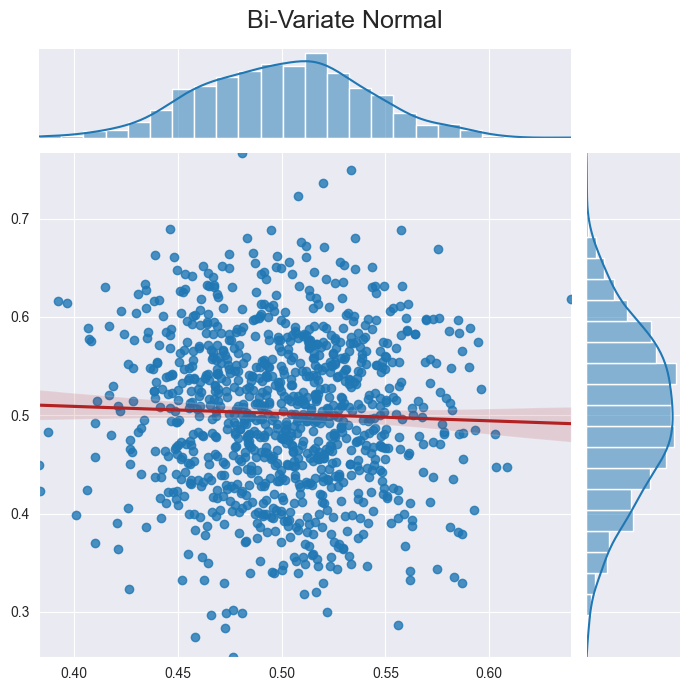

In [87]:
import seaborn as sns

joint_plot_height = 7
joint_grid = sns.jointplot(x=unif_1, y=unif_2, kind="reg", height=joint_plot_height, xlim=(unif_1.min(), unif_1.max()), ylim=(unif_2.min(), unif_2.max()),
                           joint_kws={"line_kws": {"color": "firebrick"}})

plt.suptitle("Bi-Variate Normal", fontsize=18)
plt.tight_layout()

In [88]:
import numpy as np

correlation_coefficient = np.corrcoef([fbm_values_at_time1, fbm_values_at_time2])[0, -1]
print(f"Corrlation between fbms: {correlation_coefficient:.4f}")

Corrlation between fbms: -0.0356
